## Task 1: Predict Employee Attrition

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [4]:
# 1. Load and Explore Data
data = pd.read_csv("IBM.csv") # Replace with your file path
print(data.head())
print(data.describe())

   Age Attrition              Department  DistanceFromHome  Education  \
0   41       Yes                   Sales                 1          2   
1   49        No  Research & Development                 8          1   
2   37       Yes  Research & Development                 2          2   
3   33        No  Research & Development                 3          4   
4   27        No  Research & Development                 2          1   

  EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0  Life Sciences                        2                4        Single   
1  Life Sciences                        3                2       Married   
2          Other                        4                3        Single   
3  Life Sciences                        4                3       Married   
4        Medical                        1                2       Married   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0           5993                

In [5]:
# 2. Preprocess Data
# Handle categorical features (example: using LabelEncoder)
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])


In [6]:
# Handle missing values (if any)
data = data.dropna()

# Separate features and target variable
X = data.drop("Attrition", axis=1)
y = data["Attrition"]

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Models
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [8]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, solver='liblinear')  # Specify solver
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


In [9]:
# 4. Evaluate Models
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92       255
           1       0.40      0.10      0.16        39

    accuracy                           0.86       294
   macro avg       0.64      0.54      0.54       294
weighted avg       0.81      0.86      0.82       294

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294



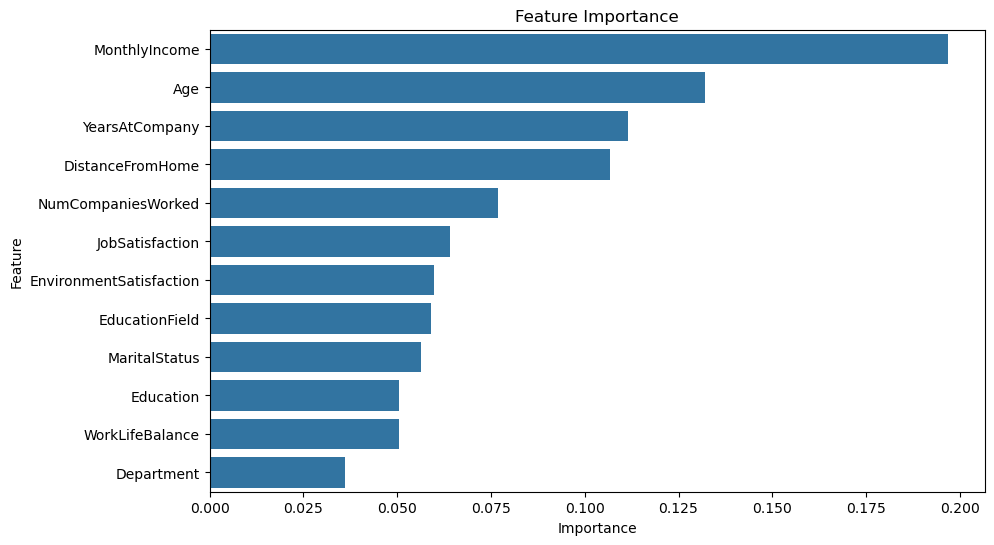

In [10]:
# 5. Feature Importance (for insights)
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()